In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
a = np.random.rand(5, 3)
a

array([[0.88560257, 0.40451952, 0.13194191],
       [0.00638475, 0.95152376, 0.76480699],
       [0.31769882, 0.36239585, 0.42777813],
       [0.50844341, 0.77669436, 0.9605783 ],
       [0.90714509, 0.3266727 , 0.45707276]])

In [3]:
print(f"Shape: {a.shape}")

Shape: (5, 3)


In [4]:
print(f"Added 5:\n{a + 5}")

Added 5:
[[5.88560257 5.40451952 5.13194191]
 [5.00638475 5.95152376 5.76480699]
 [5.31769882 5.36239585 5.42777813]
 [5.50844341 5.77669436 5.9605783 ]
 [5.90714509 5.3266727  5.45707276]]


In [5]:
print(f"Finded product X X^T:\n{a @ a.T}")

Finded product X X^T:
[[0.96533663 0.49147438 0.48439295 0.89120735 0.99582256]
 [0.49147438 1.49036795 0.6740244  1.47694641 0.66620117]
 [0.48439295 0.6740244  0.41525743 0.85391708 0.60210949]
 [0.89120735 1.47694641 0.85391708 1.78447948 1.15401096]
 [0.99582256 0.66620117 0.60210949 1.15401096 1.13854278]]


In [6]:
print(f"Mean by columns:\n{a.mean(axis=-1)}")

Mean by columns:
[0.47402133 0.5742385  0.36929094 0.74857202 0.56363018]


In [7]:
print(f"Changed shape: {a.reshape(3, 5).shape}")

Changed shape: (3, 5)


In [8]:
# YOUR CODE

In [9]:
x = torch.rand(5, 3)
x

tensor([[0.1393, 0.9413, 0.4972],
        [0.2717, 0.5055, 0.1911],
        [0.8036, 0.3605, 0.6043],
        [0.6790, 0.3459, 0.5090],
        [0.2798, 0.6166, 0.0052]])

In [10]:
print(f"Shape: {x.shape}")

Shape: torch.Size([5, 3])


In [11]:
print(f"Added 5:\n{x + 5}")

Added 5:
tensor([[5.1393, 5.9413, 5.4972],
        [5.2717, 5.5055, 5.1911],
        [5.8036, 5.3605, 5.6043],
        [5.6790, 5.3459, 5.5090],
        [5.2798, 5.6166, 5.0052]])


In [12]:
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.1527, 0.6087, 0.7518, 0.6732, 0.6220],
        [0.6087, 0.3659, 0.5161, 0.4566, 0.3887],
        [0.7518, 0.5161, 1.1409, 0.9779, 0.4503],
        [0.6732, 0.4566, 0.9779, 0.8398, 0.4059],
        [0.6220, 0.3887, 0.4503, 0.4059, 0.4585]])

X X^T  (2):
tensor([[1.1527, 0.6087, 0.7518, 0.6732, 0.6220],
        [0.6087, 0.3659, 0.5161, 0.4566, 0.3887],
        [0.7518, 0.5161, 1.1409, 0.9779, 0.4503],
        [0.6732, 0.4566, 0.9779, 0.8398, 0.4059],
        [0.6220, 0.3887, 0.4503, 0.4059, 0.4585]])


In [13]:
print(f"Mean by colunms:\n{x.mean(dim=-1)}")

Mean by colunms:
tensor([0.5260, 0.3228, 0.5895, 0.5113, 0.3005])


In [14]:
print(f"Changed shape:\n{x.view([3, 5]).shape}\n")

print(f"Another way:\n{x.view_as(x.t()).shape}\n")
print(f"No transposition\n{x.view_as(x.t()) == x.t()}")

Changed shape:
torch.Size([3, 5])

Another way:
torch.Size([3, 5])

No transposition
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])



* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

(https://github.com/torch/torch7/wiki/Torch-for-Numpy-users)


In [15]:
# YOUR CODE

In [16]:
x = torch.empty(5, 3) 
print(x)

tensor([[1.7353e-34, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 2.3694e-38],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 5.0051e+00]])


In [17]:
x = torch.rand(5, 3) 
print(x)

tensor([[0.8256, 0.8685, 0.5647],
        [0.2041, 0.1273, 0.1139],
        [0.7908, 0.6152, 0.6293],
        [0.8263, 0.4002, 0.3936],
        [0.6309, 0.4515, 0.1335]])


In [18]:
x = torch.zeros(5, 3, dtype=torch.float32)  
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [19]:
x = torch.tensor([5.5, 3]) 
print(x)

tensor([5.5000, 3.0000])


In [20]:
x1 = x.new_ones(5, 3, dtype=torch.double)  
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [21]:
x = torch.randn_like(x1, dtype=torch.float) 
print(x, x.size())

tensor([[-0.4706, -0.3280,  0.2464],
        [-1.9547,  0.1779, -0.6221],
        [ 0.7516,  1.5982, -2.3415],
        [ 0.9505,  0.3286, -0.0711],
        [ 0.0040,  1.6222, -1.8017]]) torch.Size([5, 3])


In [22]:
y = torch.rand(5, 3)
print(x + y) 

tensor([[-0.3595,  0.3146,  0.8301],
        [-1.7262,  0.6563, -0.3932],
        [ 1.4970,  2.2085, -2.2362],
        [ 1.3616,  0.8542, -0.0038],
        [ 0.0849,  2.2504, -0.9615]])


In [23]:
z = torch.add(x, y) 
print(z)

tensor([[-0.3595,  0.3146,  0.8301],
        [-1.7262,  0.6563, -0.3932],
        [ 1.4970,  2.2085, -2.2362],
        [ 1.3616,  0.8542, -0.0038],
        [ 0.0849,  2.2504, -0.9615]])


In [24]:
torch.add(x, y, out=z) 
print(z)

tensor([[-0.3595,  0.3146,  0.8301],
        [-1.7262,  0.6563, -0.3932],
        [ 1.4970,  2.2085, -2.2362],
        [ 1.3616,  0.8542, -0.0038],
        [ 0.0849,  2.2504, -0.9615]])


In [25]:
print(x * y) 

tensor([[-5.2258e-02, -2.1077e-01,  1.4380e-01],
        [-4.4668e-01,  8.5102e-02, -1.4240e-01],
        [ 5.6021e-01,  9.7539e-01, -2.4649e-01],
        [ 3.9080e-01,  1.7271e-01, -4.7871e-03],
        [ 3.2429e-04,  1.0190e+00, -1.5139e+00]])


In [26]:
print(x @ y.t()) 

tensor([[-0.1192, -0.2081, -0.5250, -0.3493, -0.0371],
        [-0.4659, -0.5040, -1.4139, -0.7521, -0.5692],
        [-0.2563,  0.4005,  1.2891,  0.9915, -0.9027],
        [ 0.2752,  0.3581,  0.9015,  0.5587,  0.2235],
        [-0.0088,  0.3647,  0.8034,  0.7331, -0.4946]])


In [27]:
print(x.mm(y.t())) 

tensor([[-0.1192, -0.2081, -0.5250, -0.3493, -0.0371],
        [-0.4659, -0.5040, -1.4139, -0.7521, -0.5692],
        [-0.2563,  0.4005,  1.2891,  0.9915, -0.9027],
        [ 0.2752,  0.3581,  0.9015,  0.5587,  0.2235],
        [-0.0088,  0.3647,  0.8034,  0.7331, -0.4946]])


In [28]:
print(x.unsqueeze(0).shape)  

torch.Size([1, 5, 3])


In [29]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  

torch.Size([5, 3])


In [30]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

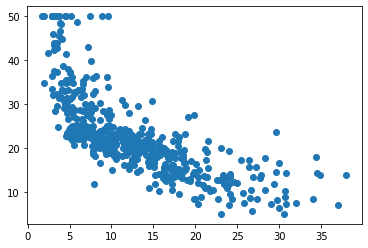

In [31]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

In [32]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)


assert w.grad is None
assert b.grad is None

In [33]:
y_pred = w * x + b                   
loss = torch.mean((y_pred - y) ** 2) 
loss.backward()                       

In [34]:
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.0718])
dL/db = 
 tensor([-44.0346])


In [35]:
w.data

tensor([0.7851])

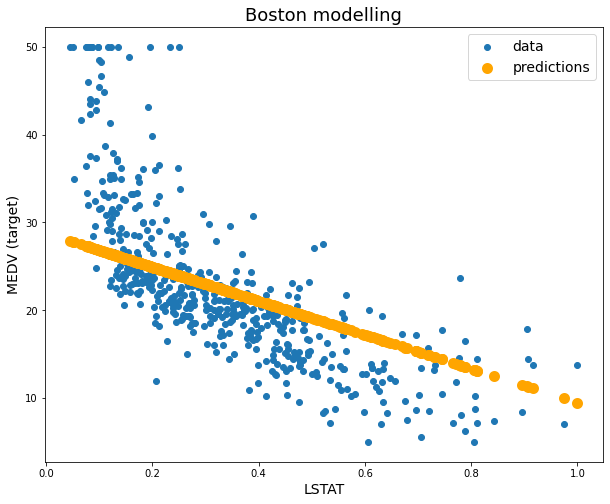

loss =  48.480026


In [36]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -=  0.05 * # YOUR CODE
    b.data -=  0.05 * # YOUR CODE

    w.grad.data.zero_()
    b.grad.data.zero_()

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


`torch.utils.data.Dataset`.

Example:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```


In [37]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [38]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [39]:
our_dataset = RandomDataset(x, y)

In [40]:
our_dataset.__getitem__(1)

{'sample': tensor([0.9767, 0.6406, 0.3816, 0.6690, 0.1215]),
 'target': 0.25324353305799463}

In [41]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

In [42]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.1073, 0.3959, 0.2165, 0.4378, 0.1421],
        [0.9767, 0.6406, 0.3816, 0.6690, 0.1215],
        [0.3001, 0.7771, 0.9639, 0.6298, 0.7899],
        [0.1713, 0.6053, 0.2430, 0.5274, 0.3562]])
Target:
tensor([0.3929, 0.2532, 0.0200, 0.0899], dtype=torch.float64)


In [43]:
model = nn.Sequential()                   
model.add_module("l1", nn.Linear(5, 10)) 
model.add_module("l2", nn.ReLU())       
model.add_module("l3", nn.Linear(10, 1)) 


another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [44]:
y_pred = model(batch['sample']) 

In [45]:
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

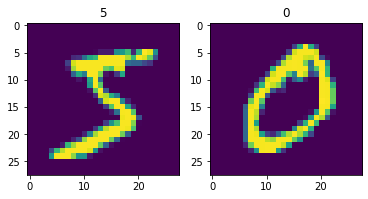

In [46]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [47]:
model = nn.Sequential(
    nn.Flatten(),             
    nn.Linear(28 * 28, 128),  
    nn.ReLU(),                
    nn.Linear(128, 10),       
)


optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

In [48]:
[x for x in model.named_parameters()] 

[('1.weight', Parameter containing:
  tensor([[-0.0349,  0.0087,  0.0308,  ..., -0.0300,  0.0071, -0.0055],
          [-0.0256,  0.0193, -0.0128,  ..., -0.0291, -0.0322, -0.0100],
          [-0.0029,  0.0138, -0.0279,  ..., -0.0015,  0.0144,  0.0091],
          ...,
          [-0.0202,  0.0011,  0.0298,  ..., -0.0093, -0.0205, -0.0173],
          [-0.0029,  0.0205, -0.0159,  ...,  0.0140, -0.0315,  0.0283],
          [-0.0357,  0.0314,  0.0292,  ...,  0.0164,  0.0090, -0.0002]],
         requires_grad=True)), ('1.bias', Parameter containing:
  tensor([-0.0280,  0.0214,  0.0296,  0.0208, -0.0152, -0.0082, -0.0065,  0.0217,
           0.0154, -0.0144, -0.0320, -0.0270, -0.0003,  0.0107, -0.0114,  0.0275,
           0.0218,  0.0231, -0.0039,  0.0242, -0.0002, -0.0002, -0.0120, -0.0204,
          -0.0163, -0.0155, -0.0190, -0.0319, -0.0014, -0.0095, -0.0159,  0.0134,
           0.0261, -0.0076,  0.0323, -0.0029, -0.0108, -0.0070,  0.0290, -0.0191,
          -0.0194,  0.0060,  0.0177,  0.03